In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [109]:
df = pd.read_csv('diet_plan_dataset.csv')
df.head()

,Age,Gender,Height_cm,Weight_kg,Desired_Weight_kg,Time_Period_weeks,BMI,BMR,Daily_Calories_Maintenance,Daily_Calories_Target,Breakfast,Lunch,Dinner,Snack
0,56,Male,178,63,56,9,19.88,1467.50,2274.62,1419.07,Greek yogurt,Sushi,Vegetable stir-fry,Protein bar
1,46,Male,194,85,72,9,22.58,1837.50,2848.12,1259.24,Smoothie,Burrito bowl,Chicken soup,Nuts and fruits
2,32,Male,195,72,61,24,18.93,1783.75,2764.81,2260.65,Oatmeal with fruits,Sushi,Steak with veggies,Protein bar
3,60,Male,159,115,107,19,45.49,1848.75,2865.56,2402.40,Smoothie,Burrito bowl,Salmon and quinoa,Nuts and fruits
4,25,Female,192,51,45,8,13.83,1424.00,2207.20,1382.20,Smoothie,Rice and beans,Tofu curry,Protein bar


### Data Review

In [5]:
print(df.shape)

(900, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         900 non-null    int64  
 1   Gender                      900 non-null    object 
 2   Height_cm                   900 non-null    int64  
 3   Weight_kg                   900 non-null    int64  
 4   Desired_Weight_kg           900 non-null    int64  
 5   Time_Period_weeks           900 non-null    int64  
 6   BMI                         900 non-null    float64
 7   BMR                         900 non-null    float64
 8   Daily_Calories_Maintenance  900 non-null    float64
 9   Daily_Calories_Target       900 non-null    float64
 10  Breakfast                   900 non-null    object 
 11  Lunch                       900 non-null    object 
 12  Dinner                      900 non-null    object 
 13  Snack                       900 non

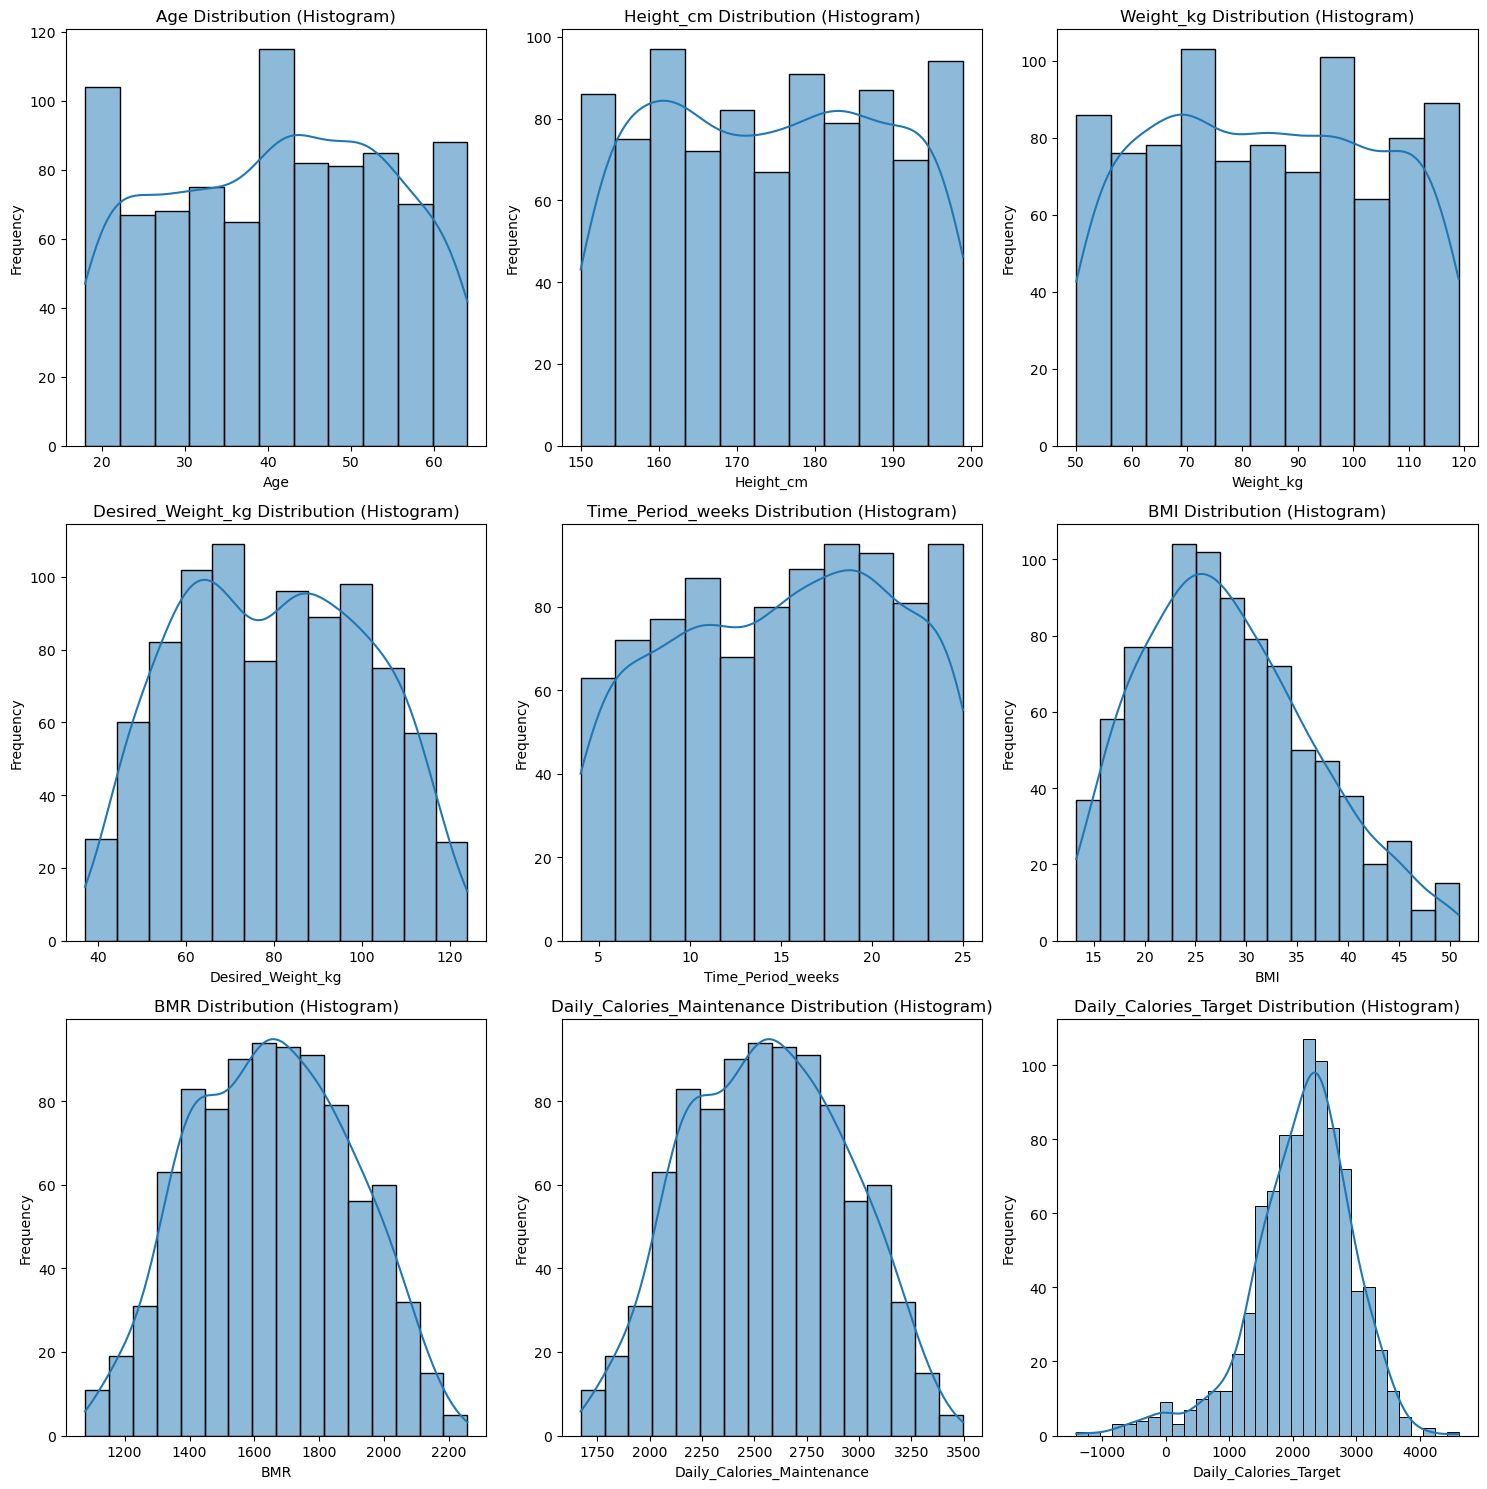

In [7]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# List of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop over numeric columns and plot the distribution for each
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column} Distribution (Histogram)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


IndexError: index 4 is out of bounds for axis 0 with size 4

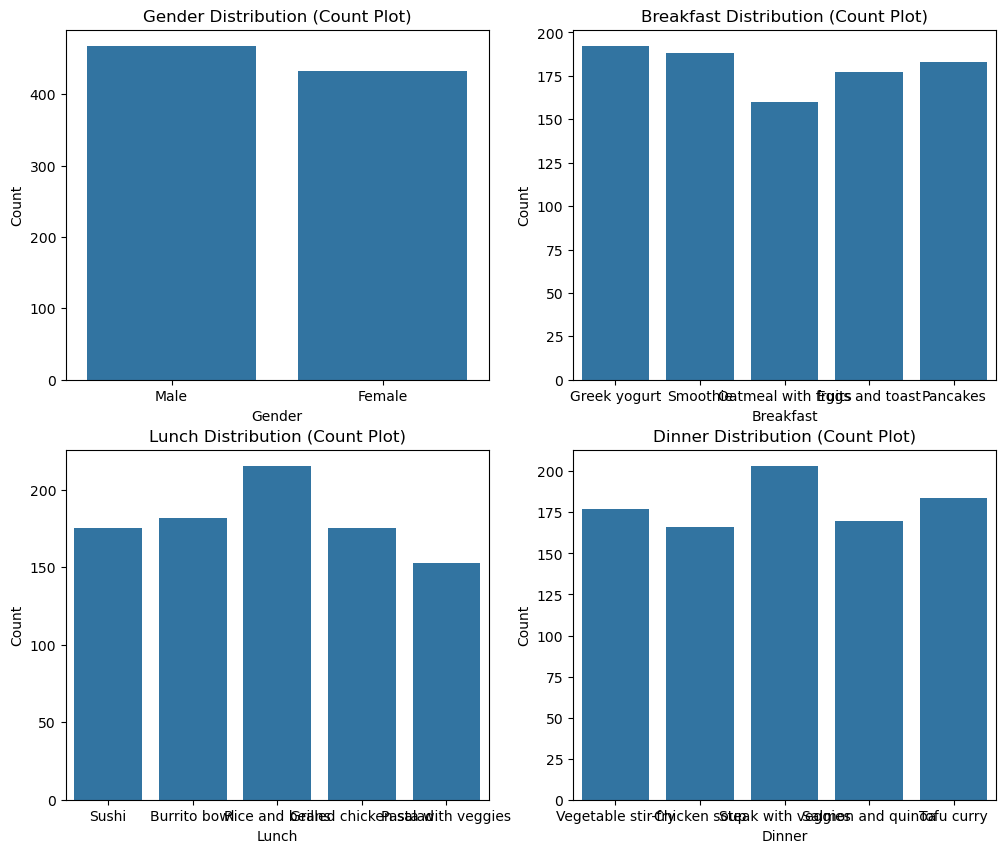

In [9]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop over categorical columns and plot the distribution for each
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column} Distribution (Count Plot)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [34]:
value_counts = df['Snack'].value_counts()
print(f"{value_counts}")

Snack
4    190
3    186
2    179
1    179
0    166
Name: count, dtype: int64


### Preprocessing

In [110]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(900, 14)

In [111]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [112]:
# Find the index of the 'Gender' column
gender_col_index = df.columns.get_loc('Gender')

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the Gender column
gender_encoded = onehot_encoder.fit_transform(df[['Gender']])

# Convert to DataFrame
gender_df = pd.DataFrame(gender_encoded, columns=onehot_encoder.get_feature_names_out(['Gender']))

# Drop the original 'Gender' column
df = df.drop(columns=['Gender'])

# Insert the encoded columns at the original position
for i, col_name in enumerate(gender_df.columns):
    df.insert(gender_col_index + i, col_name, gender_df.iloc[:, i])

In [113]:
df.head()

,Age,Gender_Male,Height_cm,Weight_kg,Desired_Weight_kg,Time_Period_weeks,BMI,BMR,Daily_Calories_Maintenance,Daily_Calories_Target,Breakfast,Lunch,Dinner,Snack
0,56,1.0,178,63,56,9,19.88,1467.50,2274.62,1419.07,Greek yogurt,Sushi,Vegetable stir-fry,Protein bar
1,46,1.0,194,85,72,9,22.58,1837.50,2848.12,1259.24,Smoothie,Burrito bowl,Chicken soup,Nuts and fruits
2,32,1.0,195,72,61,24,18.93,1783.75,2764.81,2260.65,Oatmeal with fruits,Sushi,Steak with veggies,Protein bar
3,60,1.0,159,115,107,19,45.49,1848.75,2865.56,2402.40,Smoothie,Burrito bowl,Salmon and quinoa,Nuts and fruits
4,25,0.0,192,51,45,8,13.83,1424.00,2207.20,1382.20,Smoothie,Rice and beans,Tofu curry,Protein bar


In [114]:
df.shape

(900, 14)

In [115]:
# Initialize LabelEncoder
label_encoders = {}

# Encode each target column
for col in ['Breakfast', 'Lunch', 'Dinner', 'Snack']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode the column
    label_encoders[col] = le  # Store the encoder for inverse transformation later

In [116]:
df.head(10)

,Age,Gender_Male,Height_cm,Weight_kg,Desired_Weight_kg,Time_Period_weeks,BMI,BMR,Daily_Calories_Maintenance,Daily_Calories_Target,Breakfast,Lunch,Dinner,Snack
0,56,1.0,178,63,56,9,19.88,1467.50,2274.62,1419.07,1,4,4,4
1,46,1.0,194,85,72,9,22.58,1837.50,2848.12,1259.24,4,0,0,3
2,32,1.0,195,72,61,24,18.93,1783.75,2764.81,2260.65,2,4,2,4
3,60,1.0,159,115,107,19,45.49,1848.75,2865.56,2402.40,4,0,1,3
4,25,0.0,192,51,45,8,13.83,1424.00,2207.20,1382.20,4,3,3,4
5,38,0.0,183,114,108,20,34.04,1932.75,2995.76,2665.76,1,4,1,3
6,56,0.0,175,116,111,13,37.88,1812.75,2809.76,2386.69,1,1,3,3
7,36,0.0,190,101,100,24,27.98,1856.50,2877.58,2831.74,4,4,4,2
8,40,1.0,198,111,113,21,28.31,2152.50,3336.38,3441.14,0,3,1,3
9,28,1.0,152,72,59,10,31.16,1535.00,2379.25,949.25,1,4,0,3


In [117]:
import pickle

with open("label_encoders.pkl", "wb") as file:
    pickle.dump(label_encoders, file)

In [118]:
# from sklearn.preprocessing import MinMaxScaler

# # Scale only numerical features
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# scaler = MinMaxScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [119]:
X = df.drop(['Breakfast', 'Lunch', 'Dinner', 'Snack'], axis=1) 
y = df[['Breakfast', 'Lunch', 'Dinner', 'Snack']]

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training

##### Random Forest

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

In [122]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Wrap the RandomForest with MultiOutputClassifier for multi-target classification
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)


In [123]:
param_dist = {
    'estimator__n_estimators': [50, 100, 200],  
    'estimator__max_depth': [None, 10, 20, 30],  
    'estimator__min_samples_split': [2, 5, 10],  
    'estimator__min_samples_leaf': [1, 2, 4],  
    'estimator__bootstrap': [True, False]  
}


In [124]:
random_search = RandomizedSearchCV(
    estimator=multi_target_rf,
    param_distributions=param_dist,
    n_iter=20,  # Make sure it's less than or equal to total combinations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [125]:
# Fit the RandomizedSearchCV model on the training data
random_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 30, 'estimator__bootstrap': False}


In [126]:
y_pred = best_rf_model.predict(X_test)

In [127]:
print(y_test.shape, y_pred.shape)

(180, 4) (180, 4)


In [128]:
# Compute accuracy for each meal type separately
accuracies = {}
for i, col in enumerate(y_test.columns):
    accuracies[col] = accuracy_score(y_test[col], y_pred[:, i])

# Print accuracy for each category
for meal, acc in accuracies.items():
    print(f"Accuracy for {meal}: {acc:.4f}")

# Compute the average accuracy across all target variables
overall_accuracy = sum(accuracies.values()) / len(accuracies)
print(f"Overall Average Accuracy: {overall_accuracy:.4f}")

Accuracy for Breakfast: 0.1833
Accuracy for Lunch: 0.2111
Accuracy for Dinner: 0.2056
Accuracy for Snack: 0.1889
Overall Average Accuracy: 0.1972


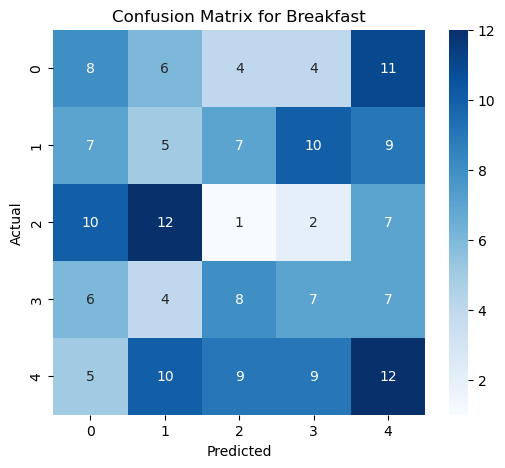

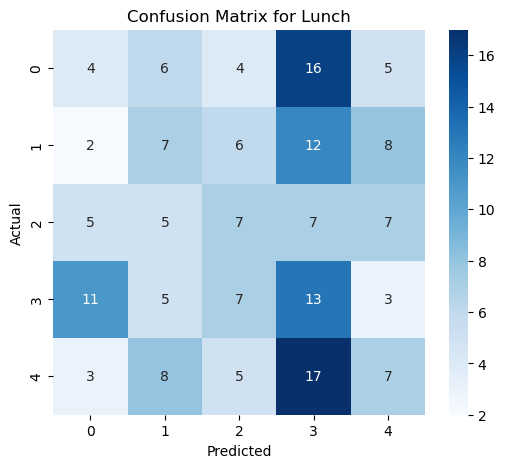

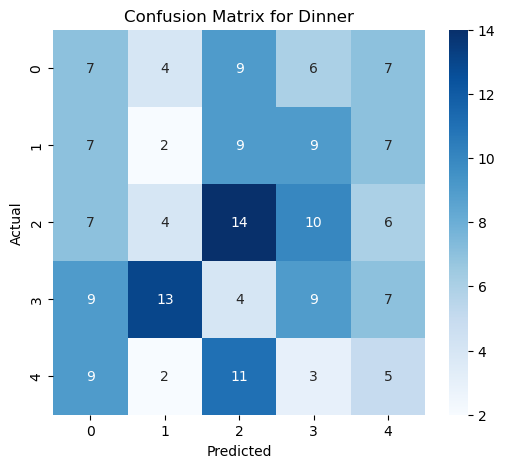

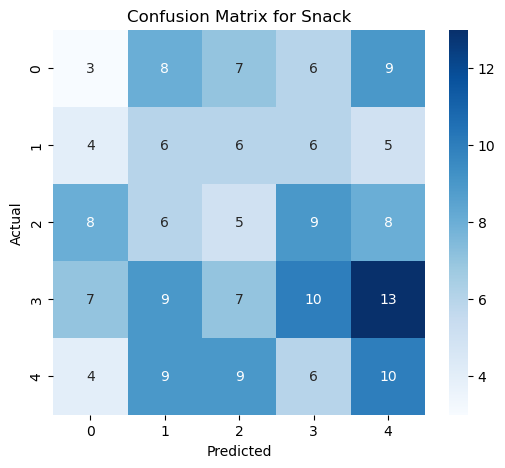

In [129]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Loop through each target variable and plot its confusion matrix
for i, col in enumerate(y_test.columns):  # Iterate over each target variable
    unique_labels = np.unique(y_test[col])  # Get unique classes for each target variable
    plot_confusion_matrix(y_test[col], y_pred[:, i], labels=unique_labels, title=f"Confusion Matrix for {col}")

In [130]:
import pickle
with open("ml_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)


##### XGBoost

In [99]:
from xgboost import XGBClassifier

In [100]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Wrap XGBoost with MultiOutputClassifier
multi_target_xgb = MultiOutputClassifier(xgb, n_jobs=-1)

In [101]:
# Define the hyperparameter grid
param_dist = {
    'estimator__n_estimators': [50, 100, 200],  
    'estimator__max_depth': [3, 5, 10],  
    'estimator__learning_rate': [0.01, 0.1, 0.2],  
    'estimator__subsample': [0.8, 1.0],  
    'estimator__colsample_bytree': [0.8, 1.0]  
}

In [102]:
# Perform RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(
    estimator=multi_target_xgb,
    param_distributions=param_dist,
    n_iter=20,  # Adjust based on available compute power
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [103]:
# Fit the model
random_search_xgb.fit(X_train, y_train)

# Get the best model and hyperparameters
best_xgb_model = random_search_xgb.best_estimator_
best_xgb_params = random_search_xgb.best_params_

print("\nBest Hyperparameters for XGBoost:", best_xgb_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Hyperparameters for XGBoost: {'estimator__subsample': 1.0, 'estimator__n_estimators': 100, 'estimator__max_depth': 10, 'estimator__learning_rate': 0.01, 'estimator__colsample_bytree': 1.0}


In [104]:
# Predict on test set
y_pred_xgb = best_xgb_model.predict(X_test)

In [105]:
# Compute accuracy for each target variable
accuracies_xgb = {}
for i, col in enumerate(y_test.columns):
    accuracies_xgb[col] = accuracy_score(y_test[col], y_pred_xgb[:, i])

# Print accuracy for each category
for meal, acc in accuracies_xgb.items():
    print(f"Accuracy for {meal}: {acc:.4f}")

# Compute the overall accuracy
overall_accuracy_xgb = sum(accuracies_xgb.values()) / len(accuracies_xgb)
print(f"Overall Average Accuracy for XGBoost: {overall_accuracy_xgb:.4f}")

Accuracy for Breakfast: 0.1389
Accuracy for Lunch: 0.1778
Accuracy for Dinner: 0.1778
Accuracy for Snack: 0.1889
Overall Average Accuracy for XGBoost: 0.1708


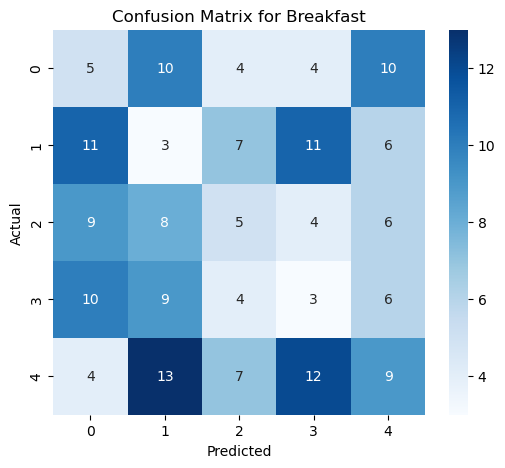

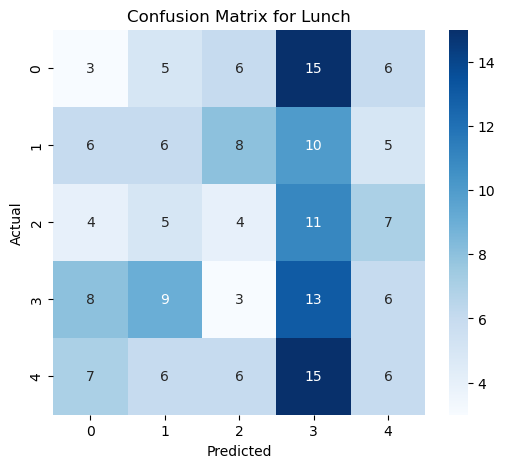

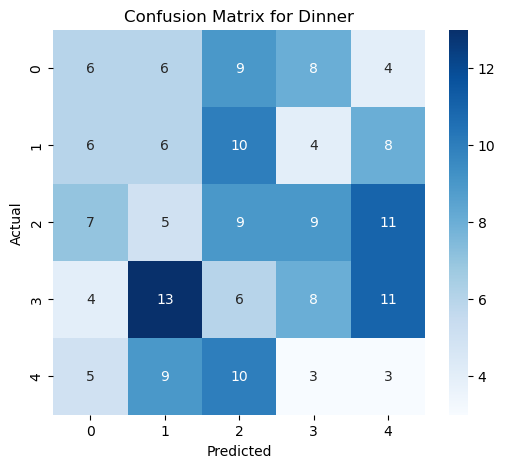

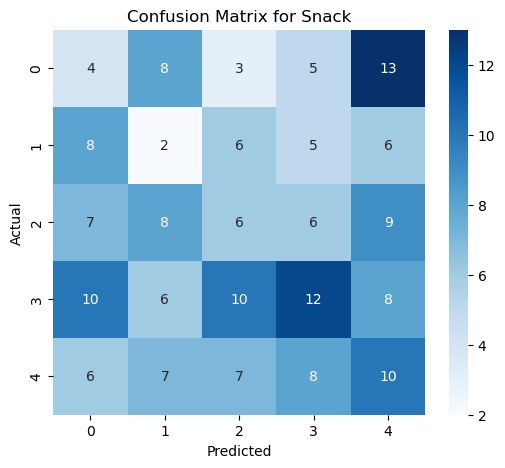

In [106]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Loop through each target variable and plot its confusion matrix
for i, col in enumerate(y_test.columns):  
    unique_labels = np.unique(y_test[col])  # Get unique class labels
    plot_confusion_matrix(y_test[col], y_pred_xgb[:, i], labels=unique_labels, title=f"Confusion Matrix for {col}")